### EWMA Models (Exponentially Weighted Moving Averages)

An EWMA Model allows you to reduce the lag effect from an SMA by putting more weight on values that occurred more recently. 

EWMA removes some of the weaknesses associated with an SMA:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging
* Does not really inform you about possible future behavious, all it really does is describe trends in your data
* Extreme historical values can skew your SMA significantly

## Example:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [4]:
airline.dropna(inplace=True)

In [5]:
airline.index = pd.to_datetime(airline.index)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [7]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [8]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

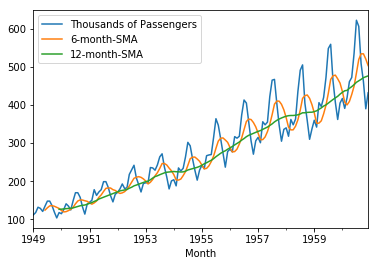

In [9]:
airline.plot()

Exponentially Weighted Moving Average...

In [10]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

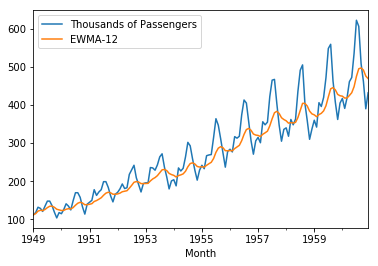

In [13]:
airline[['Thousands of Passengers','EWMA-12']].plot()

* Span corresponds to what is commonly called an "N-day EW moving average"
* Center of mass has a more physical interpretation and can be thought of in terms of span: c = (s-1)/2
* Half-life is the period of time for the exponential weight to reduce to one half
* Alpha specified the smoothing factor directly

### ETS Models (Error-Trend-Seasonality)
* Exponential Smoothing
* Trend Methods Models
* ETS Decomposition

These models allow us to decompose our time series into trend, seasonality, and resitual terms. 

In [15]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [17]:
airline.dropna(inplace=True)

In [18]:
airline.index = pd.to_datetime(airline.index)

In [19]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


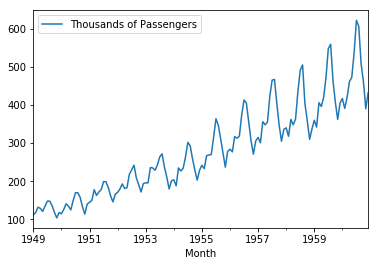

In [21]:
airline.plot()
# Let's use ETS to decompose this...

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

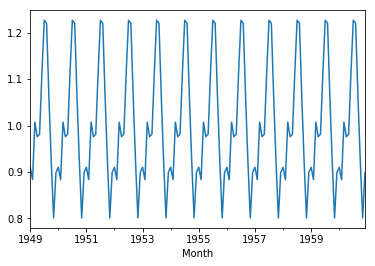

In [24]:
result.seasonal.plot()

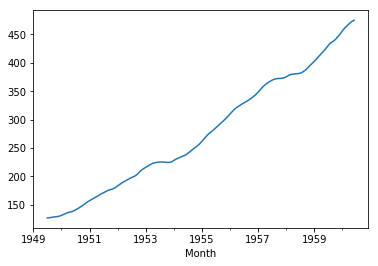

In [25]:
result.trend.plot()

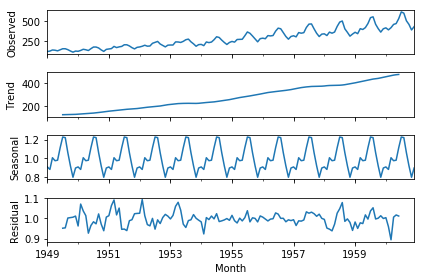

In [28]:
fig = result.plot()